In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


#from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import Ridge.Lasso
#from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score


#import statsmodels.api as sm


In [10]:
A=pd.read_csv('/Users/ranvir/Desktop/ab2.csv')
A.head()

,Unnamed: 0,RND,ADMIN,MKT,STATE,PROFIT,PR0FIT_TYPE
0,1,165349.20,136897.80,471784.10,New York,192261.83,1
1,2,162597.70,151377.59,443898.53,California,191792.06,1
2,3,153441.51,101145.55,407934.54,Florida,191050.39,1
3,4,144372.41,118671.85,383199.62,New York,182901.99,1
4,5,142107.34,91391.77,366168.42,Florida,166187.94,1


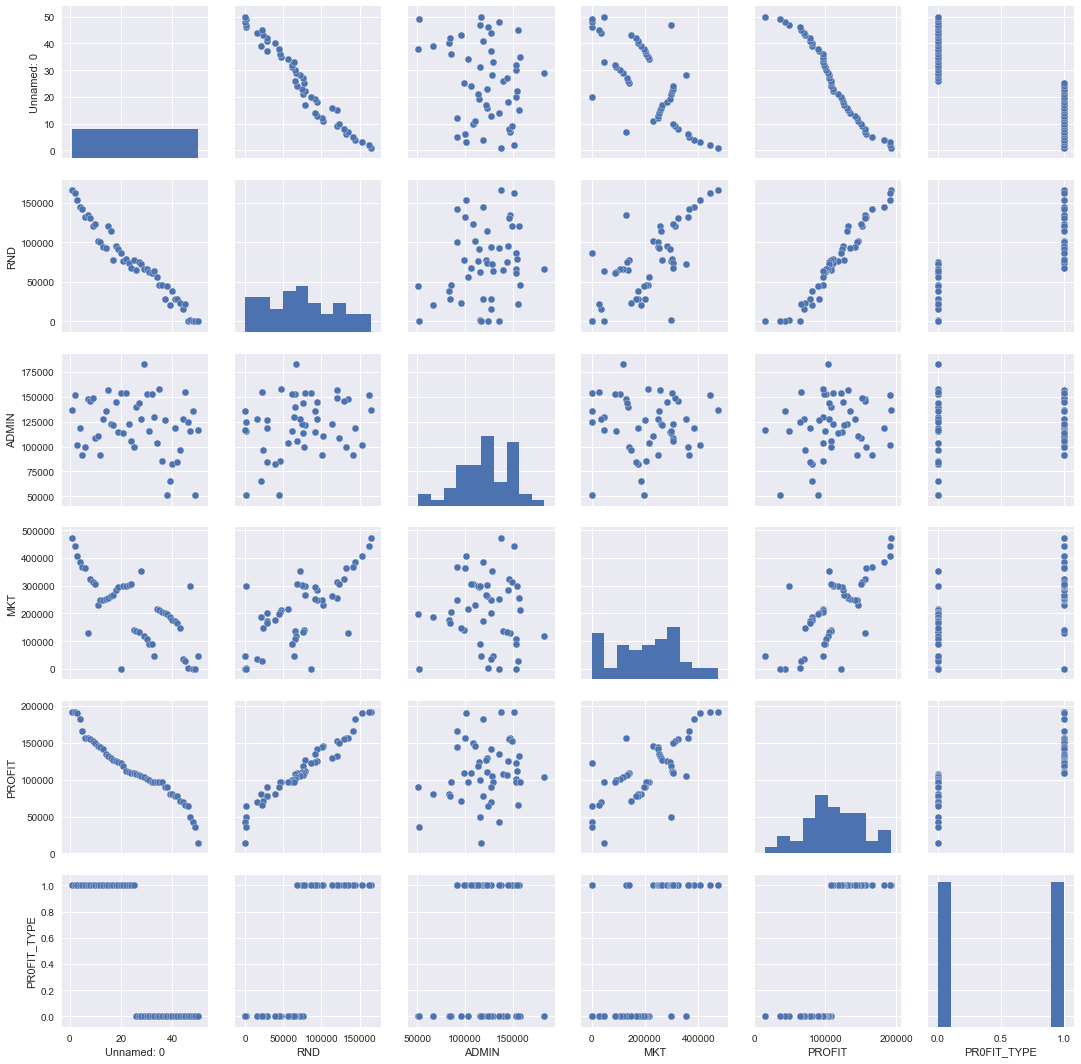

In [11]:
sn.pairplot(A)
#show a clear collinearity
plt.show()

###### USELESS : CANT OBSERVE RELATION , SEE GRAPH

In [12]:
A.corr()

,Unnamed: 0,RND,ADMIN,MKT,PROFIT,PR0FIT_TYPE
Unnamed: 0,1.000000,-0.979395,-0.229336,-0.729937,-0.973629,-0.866199
RND,-0.979395,1.000000,0.241955,0.724248,0.972900,0.803203
ADMIN,-0.229336,0.241955,1.000000,-0.032154,0.200717,0.129788
MKT,-0.729937,0.724248,-0.032154,1.000000,0.747766,0.633402
PROFIT,-0.973629,0.972900,0.200717,0.747766,1.000000,0.782277
PR0FIT_TYPE,-0.866199,0.803203,0.129788,0.633402,0.782277,1.000000


In [21]:
X=A[['RND']]
Y=A[['PR0FIT_TYPE']]
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.20,random_state=40)

In [22]:
lm=LogisticRegression()
model=lm.fit(xtrain,ytrain)

In [23]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predicted_profit=model.predict(xtest)
predicted_profit

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
ytest


,PR0FIT_TYPE
33,0
29,0
49,0
38,0
45,0
0,1
18,1
4,1
11,1
2,1


In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predicted_profit)
cm

array([[1, 4],
       [0, 5]])